In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from ipynb.fs.full.jean.types import extension, nominal

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [3]:
extension.columns

Index(['Data złożenia', 'Data zamknięcia', 'Tryb studiów', 'Typ studiów',
       'Język wykładowy', 'Kierunek', 'Status',
       'Słowo regulamin w uzasadnieniu', 'Słowo formaln w uzasadnieniu',
       'Słowo postęp w uzasadnieniu', 'Złożone odwołanie',
       'Liczba zmian statusu', 'Semestr aktualny', 'Semestr studiow',
       'Brakujace ECTS', 'ECTS uznane w bieżącym semstrze',
       'Suma zdobytych ECTS', 'Niezaliczone z sem 1', 'Niezaliczone z sem 2',
       'Niezaliczone z sem 3', 'Niezaliczone z sem 4', 'Niezaliczone z sem 5',
       'Niezaliczone z sem 6', 'Liczba brakujacych przedmiotow',
       'Brakujace przedmioty', 'Opłata za niezaliczone przedmioty',
       'Liczba prac dyplomowych', 'Informacje o pracach dyplomowych',
       'Stopień zaawansowania pracy', 'Słowo rodzin lub famil w uzasadnieniu',
       'Słowo zdrow lub health w uzasadnieniu',
       'Słowo bardzo proszę w uzasadnieniu', 'Słowo losow w uzasadnieniu',
       'Słowo prac lub work w uzasadnieniu',
       'S

In [4]:
extension['Kierunek'].unique()

array(['Model 2,I,D,PL,7 - Automatyka.',
       'Model 2,M,D,PL,3 - Elektronika Przemysłowa',
       'Model 2,I,D,PL,7 - Sieci i Systemy Elektroenergetyczne',
       'Model 2,I,D,PL,7 - Technika Wysokich Napięć i Kompatybilność Elektromagnetyczna',
       'Model 2,I,D,PL,7 - Elektronika Przemysłowa',
       'Model 2,I,D,PL,7 - Inżynieria  Oprogramowania',
       'Model 2,I,D,PL,7 - Elektromechatronika Pojazdów i Maszyny Elektryczne',
       'Model 2,I,D,PL,7 - Technika Świetlna i Multimedialna',
       'Model 2,M,D,PL,3 - Automatyka i robotyka',
       'Model 2,M,D,EN,3 - Electrical Engineering',
       'Model 2,M,D,PL,3 - Automatyka.',
       'Model 2,I,D,PL,7 - Aparaty Elektroenergetyczne',
       'Model 2,M,D,PL,3 - Inżynieria  komputerowa',
       'Model 2,M,D,PL,3 - Wytwarzanie i użytkowanie energii elektrycznej',
       'Model 2,I,D,PL,7 - Automatyka i robotyka',
       'Model 2,I,D,PL,7 - Systemy wbudowane',
       'Model 2,M,D,PL,3 - Elektromechatronika Pojazdów i Maszyny Elekt

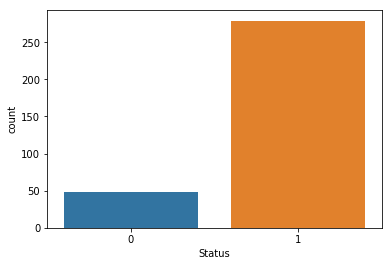

In [5]:
_ = sns.countplot(extension['Status'])

In [6]:
base_precision = len(extension[extension['Status'] == 1].index) / len(extension.index)
base_precision

0.8532110091743119

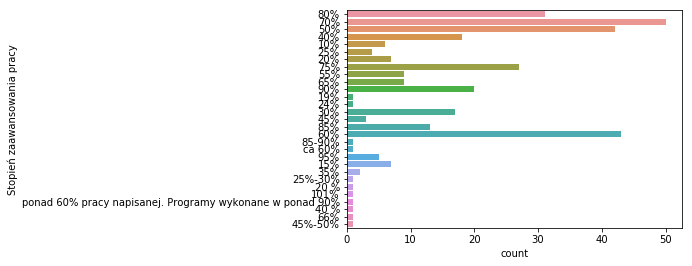

In [7]:
_ = sns.countplot(y=extension['Stopień zaawansowania pracy'])

In [8]:
extension[['Liczba prac dyplomowych', 'Informacje o pracach dyplomowych', 'Stopień zaawansowania pracy']].head()

,Liczba prac dyplomowych,Informacje o pracach dyplomowych,Stopień zaawansowania pracy
234,1,"[mgr inż. Monika Jakubowska,ZNE,Automatyka]",80%
373,2,"[dr inż. Marcin Kołodziej,ZSIP,Elektronika Prz...",70%
381,2,"[mgr inż. Monika Jakubowska,ZNE,Automatyka],[m...",50%
559,1,"[dr hab. inż. Dariusz Baczyński,ZSIS,Sieci i S...",40%
679,1,"[mgr inż. Maciej Ciuba,ZWNiKE,Technika Wysokic...",80%


In [9]:
pd.set_option('display.max_colwidth', -1)
print(extension[extension['Stopień zaawansowania pracy'].isnull()]['Informacje o pracach dyplomowych'])
pd.reset_option('display.max_colwidth')

3813    [dr inż. Krzysztof Bieńkowski,ZME,Automatyka],[prof. nzw. dr hab. inż. Dominik Sierociuk,ZS,Automatyka]               
3814    [mgr inż. Krzysztof Jackiewicz,ZME,Elektronika Przemysłowa],[dr inż. Krzysztof Bieńkowski,ZNE,Elektronika Przemysłowa]
4576    [dr hab. inż. Piotr Biczel,ZWNiKE,Elektromechatronika Pojazdów i Maszyny Elektryczne]                                 
Name: Informacje o pracach dyplomowych, dtype: object


In [10]:
import re
from statistics import mean

progress = {
    'ponad 60% pracy napisanej. Programy wykonane w ponad 90%': 0.75,
    'ca 60%': 0.6,
    '101%': np.nan,
    np.nan: np.nan
}

def parse_percent(s):
    r = re.match('^((\d\d)%?-(\d\d)%)|((\d\d)(\s*)%)$', s)
    percent = int(r[5]) if r[5] != None else mean([int(r[2]), int(r[3])])
    return percent / 100
parse_progress = lambda x: progress.get(x) if progress.get(x) else parse_percent(x)

extension['Stopień zaawansowania pracy'] = extension['Stopień zaawansowania pracy'].apply(parse_progress)

In [11]:
extension = extension.dropna(subset=['Stopień zaawansowania pracy'])

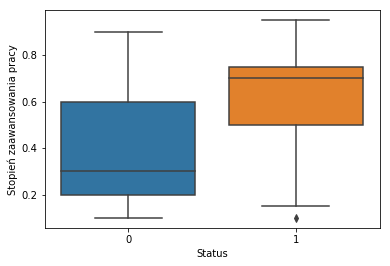

In [12]:
_ = sns.boxplot(extension['Status'], extension['Stopień zaawansowania pracy'])

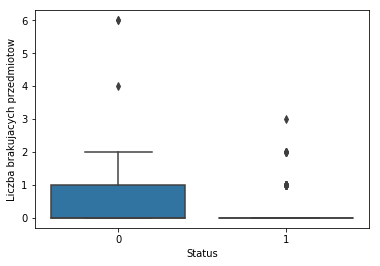

In [13]:
_ = sns.boxplot(extension['Status'], extension['Liczba brakujacych przedmiotow'])

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


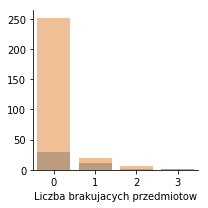

In [14]:
grid = sns.FacetGrid(extension, hue="Status")
_ = grid.map(sns.countplot, "Liczba brakujacych przedmiotow", alpha=0.5)

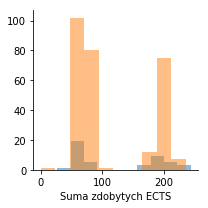

In [15]:
grid = sns.FacetGrid(extension, hue="Status")
_ = grid.map(plt.hist, "Suma zdobytych ECTS", alpha=0.5)

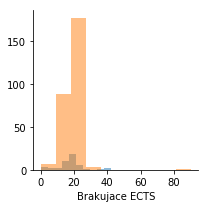

In [16]:
grid = sns.FacetGrid(extension, hue="Status")
_ = grid.map(plt.hist, "Brakujace ECTS", alpha=0.5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


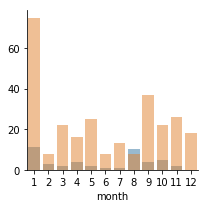

In [17]:
grid = sns.FacetGrid(extension, hue="Status")
_ = grid.map(sns.countplot, "month", alpha=0.5)

In [18]:
def per_status(status):
    return extension[extension.Status == status]
def failed_subj(status):
    return len(per_status(status)[extension['Liczba brakujacych przedmiotow'] > 0])
failed_sub_ratio = lambda status: failed_subj(status) / len(per_status(status))

pd.DataFrame({
    "> 0": [failed_subj(0), failed_subj(1)],
    "all": [len(per_status(0)), len(per_status(1))],
    "ratio": [failed_sub_ratio(0), failed_sub_ratio(1)]
}).transpose()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,0,1
> 0,16.000000,26.000000
all,45.000000,278.000000
ratio,0.355556,0.093525


In [19]:
def thesis_number_ratio(number):
    rejected = len(per_status(0)[extension['Liczba prac dyplomowych'] == number])
    return rejected / len(extension)
pd.DataFrame([thesis_number_ratio(1), 
              thesis_number_ratio(2),
              thesis_number_ratio(3),
             ]).transpose()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,0,1,2
0,0.077399,0.052632,0.009288


In [20]:
def drop_single_val_cols(df): 
    return df[[c for c in df.columns if len(df[c].unique()) > 1]]

In [21]:
dropext = ['Brakujace przedmioty', 'Data złożenia', 'Data zamknięcia']
e = extension.drop(dropext, 'columns').drop(extension[extension['Stopień zaawansowania pracy'].isnull()].index)
e = drop_single_val_cols(e)

In [23]:
relevant_cols = [
    'Stopień zaawansowania pracy', 
    'Liczba brakujacych przedmiotow', 
    'Liczba prac dyplomowych',
    'month'
]
x_train, x_test, y_train, y_test = train_test_split(
    extension[relevant_cols], 
    extension['Status']
)

In [24]:

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.88      1.00      0.93        70

   micro avg       0.88      0.88      0.88        81
   macro avg       0.94      0.55      0.55        81
weighted avg       0.89      0.88      0.83        81



/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.87      0.99      0.93        70

   micro avg       0.86      0.86      0.86        81
   macro avg       0.69      0.54      0.54        81
weighted avg       0.82      0.86      0.82        81

